__NAME:__ __FULLNAME__  
__SECTION:__ __NUMBER__  
__CS 5970: Machine Learning Practices__

# Homework 13: Clustering

## Notes
Solution reference to HW13.

## Assignment Overview
Follow the TODOs and read through and understand any provided code.  
For all plots, make sure all necessary axes and curves are clearly and 
accurately labeled. Include figure/plot titles appropriately as well.
Post any questions to the Canvas Discussion.

For this assignment you will be exploring clustering. Clustering is an unsupervised learning technique that can be utilized to discover interesting patterns or groupings amongst data.

Select one of the two tasks below

### [Task 1](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)
Explore clustering for the Human Activity Recognition dataset. Recordings come from 30 subjects
performing activities of daily living while carrying a waist-mounted smartphone with embedded
inertial sensors.


### Task 2
Explore clustering for a few synthetic datasets.


### Objectives
* Clustering
* Dimensionality Reduction


### General References
* [Guide to Jupyter](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)
* [Python Built-in Functions](https://docs.python.org/3/library/functions.html)
* [Python Data Structures](https://docs.python.org/3/tutorial/datastructures.html)
* [Numpy Reference](https://docs.scipy.org/doc/numpy/reference/index.html)
* [Numpy Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
* [Summary of matplotlib](https://matplotlib.org/3.1.1/api/pyplot_summary.html)
* [DataCamp: Matplotlib](https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python?utm_source=adwords_ppc&utm_campaignid=1565261270&utm_adgroupid=67750485268&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=1t1&utm_creative=332661264365&utm_targetid=aud-299261629574:dsa-473406587955&utm_loc_interest_ms=&utm_loc_physical_ms=9026223&gclid=CjwKCAjw_uDsBRAMEiwAaFiHa8xhgCsO9wVcuZPGjAyVGTitb_-fxYtkBLkQ4E_GjSCZFVCqYCGkphoCjucQAvD_BwE)
* [Pandas DataFrames](https://urldefense.proofpoint.com/v2/url?u=https-3A__pandas.pydata.org_pandas-2Ddocs_stable_reference_api_pandas.DataFrame.html&d=DwMD-g&c=qKdtBuuu6dQK9MsRUVJ2DPXW6oayO8fu4TfEHS8sGNk&r=9ngmsG8rSmDSS-O0b_V0gP-nN_33Vr52qbY3KXuDY5k&m=mcOOc8D0knaNNmmnTEo_F_WmT4j6_nUSL_yoPmGlLWQ&s=h7hQjqucR7tZyfZXxnoy3iitIr32YlrqiFyPATkW3lw&e=)
* [Sci-kit Learn Linear Models](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)
* [Sci-kit Learn Ensemble Models](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)
* [Sci-kit Learn Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)
* [Sci-kit Learn Model Selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection)
* [Sci-kit Learn Pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
* [Sci-kit Learn Preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
* [KMeans](https://stackabuse.com/k-means-clustering-with-scikit-learn/)


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import os, re, fnmatch
import pathlib, itertools
import time as timelib
import matplotlib.pyplot as plt
import matplotlib.patheffects as peffects

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import explained_variance_score, confusion_matrix
from sklearn.metrics import mean_squared_error, roc_curve, auc, f1_score

from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.neighbors import NearestNeighbors
import joblib

FIGWIDTH = 5
FIGHEIGHT = 5
FONTSIZE = 12

plt.rcParams['figure.figsize'] = (FIGWIDTH, FIGHEIGHT)
plt.rcParams['font.size'] = FONTSIZE

plt.rcParams['xtick.labelsize'] = FONTSIZE
plt.rcParams['ytick.labelsize'] = FONTSIZE

%matplotlib inline

# TASK 1 DATASET: UCI_HAR_Dataset

### LOAD DATA

In [6]:
"""
https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

Abstract: Human Activity Recognition database built from the recordings of 30 subjects
performing activities of daily living (ADL) while carrying a waist-mounted smartphone 
with embedded inertial sensors.

Number of Attributes: 561

Source:
Jorge L. Reyes-Ortiz(1,2), Davide Anguita(1), Alessandro Ghio(1), Luca Oneto(1) and
Xavier Parra(2)
1 - Smartlab - Non-Linear Complex Systems Laboratory
DITEN - Università degli Studi di Genova, Genoa (I-16145), Italy.
2 - CETpD - Technical Research Centre for Dependency Care and Autonomous Living
Universitat Politècnica de Catalunya (BarcelonaTech). Vilanova i la Geltrú (08800), 
Spain activityrecognition '@' smartlab.ws


Data Set Information:
The experiments have been carried out with a group of 30 subjects. Each person
performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, 
STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise 
filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap
(128 readings/window).

Check the README.txt file for further details about this dataset.

Attribute Information:
For each record in the dataset it is provided:
- Triaxial acceleration from the accelerometer (total acceleration) and the 
  estimated body acceleration.
- Triaxial Angular velocity from the gyroscope.
- A 561-feature vector with time and frequency domain variables.
- Its activity label.
- An identifier of the subject who carried out the experiment.

Citation:
Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra and Jorge L. Reyes-Ortiz. A Public Domain Dataset for Human Activity Recognition Using Smartphones. 21th European Symposium on Artificial Neural Networks, Computational Intelligence and Machine Learning, ESANN 2013. Bruges, Belgium 24-26 April 2013.
"""
# Set any data file paths appropriately
data = pd.read_csv('UCI_HAR_Dataset/uci_har_Xy_train.csv')
data.shape

(7352, 563)

In [7]:
data.head()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.923527         -0.934724  ...                        -0.710304   
1         -0.957686         -0.943068  ...                        -0.861499   
2         -0.977469         -0.938692  ...                        -0.760104   
3         -0.989302         -0.938692  ...                        -0.482845   
4         -0.990441         -0.942469  ...                        -0.699205   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   
2                    -0.118559                              0.177899   
3                    -0.036788                             -0.012892   
4                     0.123320                              0.122542   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   
2                          0.100699                              0.808529   
3                          0.640011                             -0.485366   
4                          0.693578                             -0.615971   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  \
0             -0.841247              0.179941             -0.058627   
1             -0.844788              0.180289             -0.054317   
2             -0.848933              0.180637             -0.049118   
3             -0.848649              0.181935             -0.047663   
4             -0.847865              0.185151             -0.043892   

   activity_label  subj_number  
0               5            1  
1               5            1  
2               5            1  
3               5            1  
4               5            1  

[5 rows x 563 columns]

In [8]:
""" PROVIDED
Check for any NaNs
"""
data.isna().any().any()

False

In [9]:
data.describe()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.000000         -1.000000   
25%           -0.992754         -0.978129         -0.980233         -0.993591   
50%           -0.946196         -0.851897         -0.859365         -0.950709   
75%           -0.242813         -0.034231         -0.262415         -0.292680   
max            1.000000          0.916238          1.000000          1.000000   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
count       7352.000000       7352.000000       7352.000000  ...   
mean          -0.526907         -0.606150         -0.468604  ...   
std            0.485942          0.414122          0.544547  ...   
min           -1.000000         -1.000000         -1.000000  ...   
25%           -0.978162         -0.980251         -0.936219  ...   
50%           -0.857328         -0.857143         -0.881637  ...   
75%           -0.066701         -0.265671         -0.017129  ...   
max            0.967664          1.000000          1.000000  ...   

       fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
count                      7352.000000                  7352.000000   
mean                         -0.625294                     0.008684   
std                           0.307584                     0.336787   
min                          -0.999765                    -0.976580   
25%                          -0.845573                    -0.121527   
50%                          -0.711692                     0.009509   
75%                          -0.503878                     0.150865   
max                           0.956845                     1.000000   

       angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
count                           7352.000000                       7352.000000   
mean                               0.002186                          0.008726   
std                                0.448306                          0.608303   
min                               -1.000000                         -1.000000   
25%                               -0.289549                         -0.482273   
50%                                0.008943                          0.008735   
75%                                0.292861                          0.506187   
max                                1.000000                          0.998702   

       angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
count                           7352.000000           7352.000000   
mean                              -0.005981             -0.489547   
std                                0.477975              0.511807   
min                               -1.000000             -1.000000   
25%                               -0.376341             -0.812065   
50%                               -0.000368             -0.709417   
75%                                0.359368             -0.509079   
max                                0.996078              1.000000   

       angle(Y,gravityMean)  angle(Z,gravityMean)  activity_label  subj_numbe

In [10]:
""" TODO
Class counts
use pd.value_counts(data['activity_label']) to determine how many instances there 
are for each activity class
"""
cnt = pd.value_counts(data['activity_label'])
cnt

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: activity_label, dtype: int64

In [11]:
""" PROVIDED
Feature names for each column in the data
"""
features = pd.read_csv('UCI_HAR_Dataset/meta/features.txt', sep='\s+', header=None)
features.columns = ['num', 'feature_name']
features.shape

(561, 2)

In [12]:
features.head()

num       feature_name
0    1  tBodyAcc-mean()-X
1    2  tBodyAcc-mean()-Y
2    3  tBodyAcc-mean()-Z
3    4   tBodyAcc-std()-X
4    5   tBodyAcc-std()-Y

In [13]:
""" PROVIDED
Activity Class Label names
"""
activity_labels = pd.read_csv('UCI_HAR_Dataset/meta/activity_labels.txt', sep='\s+', header=None)
activity_labels.columns = ['num', 'activity_name']
nclasses, ncols = activity_labels.shape
nclasses, ncols

(6, 2)

In [14]:
# Display class names and corresponding number
activity_labels

num       activity_name
0    1             WALKING
1    2    WALKING_UPSTAIRS
2    3  WALKING_DOWNSTAIRS
3    4             SITTING
4    5            STANDING
5    6              LAYING

In [15]:
# Separate out just the class names
activity_names = list(activity_labels['activity_name'].values)
activity_names

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']

### PARTITION DATA

In [16]:
""" TODO
Separate the data into X and y. Use the features variable to pull out the 
appropriate feature data. For y we are predicting the 'activity_label' 
column from the data.

Hold out a subset of the data, using train_test_split, a test_size 
fraction of .2, and shuffle to False
"""
# Feature Names
feature_names = features['feature_name'].values

# TODO: Separate the data into X and y
X = data[feature_names].copy()
# Substract 1 from the label number for convenience, such that number matches
# the list index. i.e. changing the label numbers from 1 to 6 to 0 to 5
y = data['activity_label'].copy().values - 1

# TODO: Split into train and validation
Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.2, shuffle=False)

nsamples_train = Xtrain.shape[0]

Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((5881, 561), (1471, 561), (5881,), (1471,))

### CLUSTERING

In [17]:
def group_scatter_plot(X, labels, feature_names, label_names, centers=None,
                         leg_on=False, FIGSIZE=(15,10), elev=35, angle=310):
    '''
    Plot 2D or 3D scatter plots of selected sets of features
    PARAMS:
        X: full feature space as a dataframe
        labels: labels for each example in X
        feature_names: subset of features to plot from X
        label_names: contains nclass elements, where each element is the name 
                     for each class (Note: only viable for classes not clusters)
        centers: nclass-by-2 or nclass-by-3 matrix of group centers.
        leg_on: flag whether to display the legend (Note: only set True when 
                plotting the actual class groupings. False when displaying clusters)
        FIGSIZE: tuple of figure width and height
        elev: 3D plot view elevation
        angle: 3D plot view angle
    '''
    # Select a subset of features
    data = X[feature_names].copy().values

    # Create the figure
    fig = plt.figure(figsize=FIGSIZE)
    
    # 2D Plots
    if data.shape[1] == 2:
        ax0 = fig.add_subplot(111)
        # Plot the points by class or cluster
        for i, name in enumerate(label_names):
            inds = labels == i
            ax0.scatter(data[inds,0], data[inds,1], label=name)
        ax0.set(xlabel=feature_names[0], ylabel=feature_names[1])
        if leg_on: ax0.legend()
        
    # 3D Plots
    elif data.shape[1] > 2:
        ax0 = fig.add_subplot(111, projection='3d')
        # Plot the points by class or cluster
        for i, name in enumerate(label_names):
            inds = labels == i
            ax0.scatter(data[inds,0], data[inds,1], data[inds,2], label=name)
        ax0.set(xlabel=feature_names[0], ylabel=feature_names[1], 
                zlabel=feature_names[2])
        ax0.view_init(elev, angle)
        if leg_on: ax0.legend()
    
    if centers is not None:
        # Plot the group centers
        mn = np.min(labels)
        mx = np.max(labels)
        if data.shape[1] == 2:
            ax0.scatter(centers[:,0], centers[:,1], c=np.arange(mn, mx+1), 
                        marker='D', cmap=plt.cm.rainbow)
        elif data.shape[1] > 2:
            ax0.scatter(centers[:,0], centers[:,1], centers[:,2], 
                       c=np.arange(mn, mx+1), marker='D', cmap=plt.cm.rainbow)

In [18]:
def compute_class_centers(X, y, feature_names, classes):
    '''
    Compute group centers within the selected sub-feature space
    PARAMS:
        X: full feature space
        y: labels for each example in X
        classes: contains nclass elements, where each element is the index for each class
    '''
    data = X[feature_names].copy().values

    nclasses = len(classes)
    nfeats = len(feature_names)
    centers = np.empty((nclasses, nfeats))
    
    for c in classes:
        centers[c, :] = np.mean(data[y == c, :], axis=0)
    return centers

/Users/alanlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


426.43635870703605

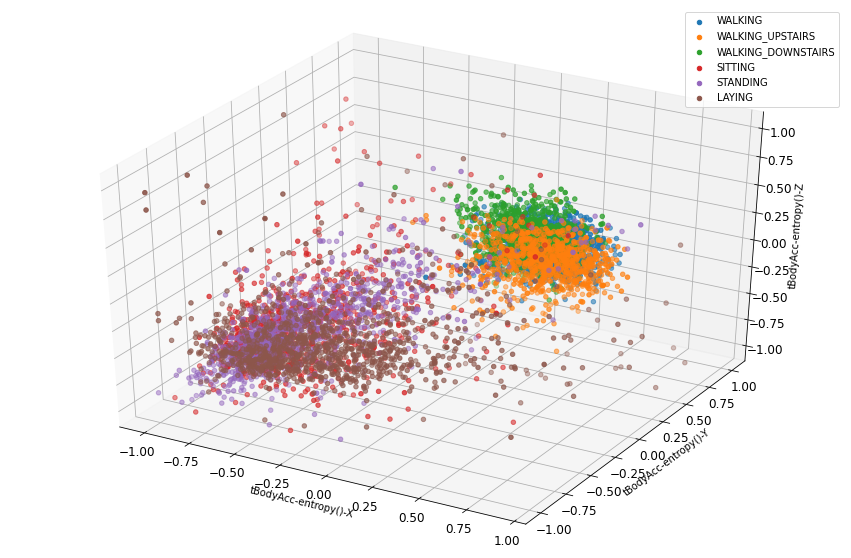

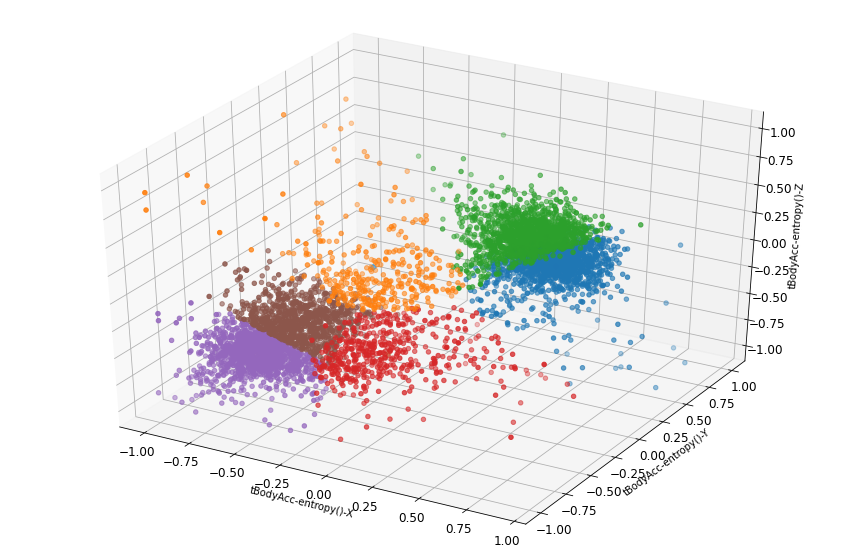

In [19]:
""" TODO
Observe and analyze 2 feature subspaces of 2 or 3 features. To do this select sets
of 2 or 3 features. For example, consider the feature subspace defined by the features
'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y' and 'tBodyAcc-entropy()-Z'.

First plot the actual classifications in this subspace using:
    group_scatter_plot(Xtrain, ytrain, selected_feats, activity_names, leg_on=True, angle=300)

Second, construct a KMeans model for unsupervised learning of various clusterings of
the data in the selected feature subspaces. Use predict on the KMeans model to determine
the set of 6 clusters. Use group_scatter_plot(leg_on=False) with the predicted clusters as the 
labels, and not the real classifications. Display the model's interia (i.e. the sum of squared
distances of samples to their closest cluster center)

Observe the class groupings in the subspace from the features:
'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z'
"""
angle = 300

feats = ['tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z'] # TODO: list of subset of selected features
# TODO: Plot Actual classifications. use group_scatter_plot with leg_on=True
group_scatter_plot(Xtrain, ytrain, feats, activity_names, leg_on=True, angle=angle)

tBodyAcc_entropy_centers = compute_class_centers(Xtrain, ytrain, feats, range(nclasses))

# TODO: Determine clusters. Create KMeans model and predict the clusters
ins = Xtrain[feats]
model = KMeans(n_clusters=6, init='random', n_init=10, n_jobs=-1)
model.fit(ins)
# TODO: use predict to determine a set of clusters
pred = model.predict(ins)

# TODO: Plot determined clusters. use group_scatter_plot with leg_on=False
group_scatter_plot(Xtrain, pred, feats, activity_names, 
                   angle=angle, centers=model.cluster_centers_)

#err = mean_squared_error(tBodyAcc_entropy_centers, model.cluster_centers_)
#print(err)

# Sum of squared distances of samples to their closest cluster center
model.inertia_

/Users/alanlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


270.3295700613299

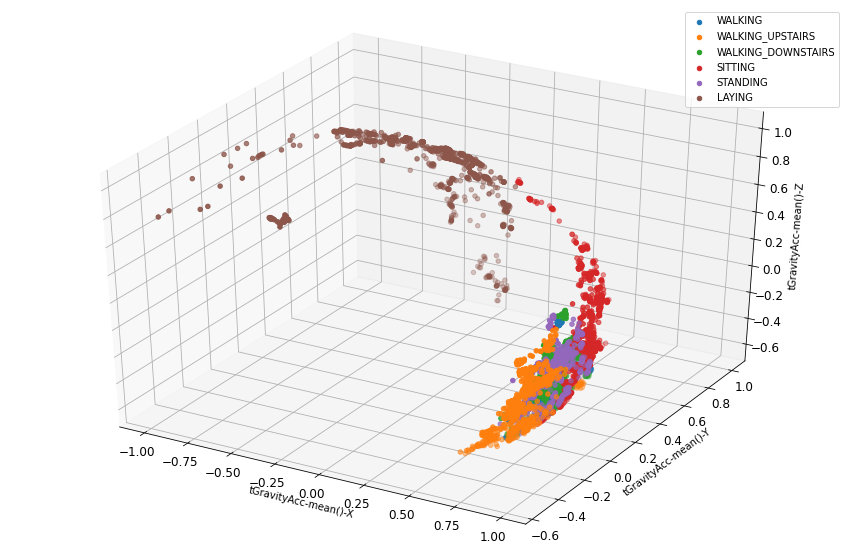

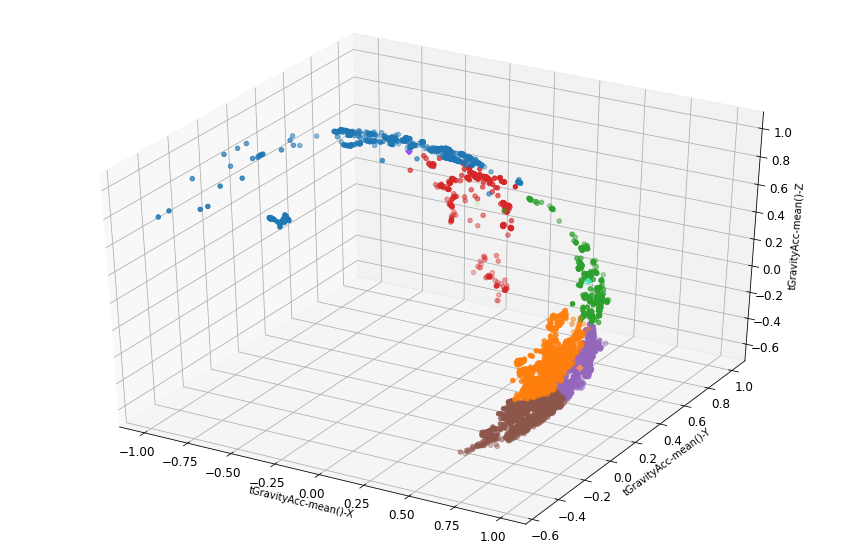

In [20]:
"""
Observe the class groupings in another subspace from the features:
'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z'
"""
feats = ['tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z']
# Plot classfications
group_scatter_plot(Xtrain, ytrain, feats, activity_names, leg_on=True, angle=300)

tGravityAcc_mean_centers = compute_class_centers(Xtrain, ytrain, feats, range(nclasses))

# Determine clusters
ins = Xtrain[feats]
model = KMeans(n_clusters=6, init='random', n_init=10, n_jobs=-1)
model.fit(ins)
pred = model.predict(ins)

# Plot determined clusters
group_scatter_plot(Xtrain, pred, feats, activity_names,
                   angle=300, centers=model.cluster_centers_)

#err = mean_squared_error(tGravityAcc_mean_centers, model.cluster_centers_)
#print(err)

model.inertia_

/Users/alanlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


890.5141850019806

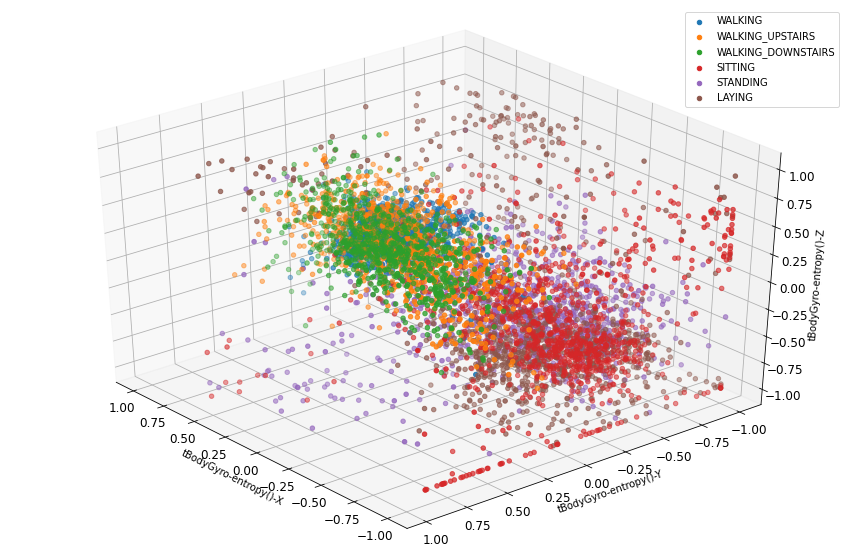

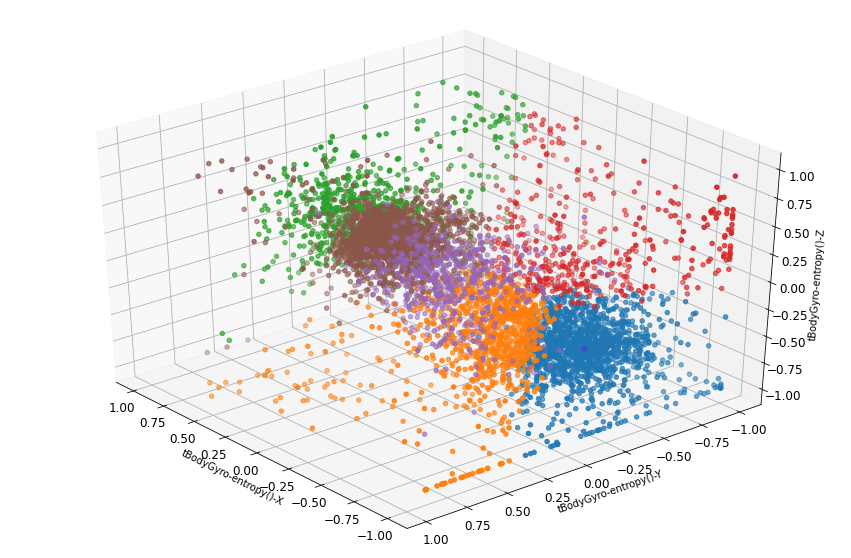

In [21]:
"""
Observe the class groupings in the subspace from the features:
'tBodyGyro-entropy()-X', 'tBodyGyro-entropy()-Y', 'tBodyGyro-entropy()-Z'
"""
angle = 140

feats = ['tBodyGyro-entropy()-X', 'tBodyGyro-entropy()-Y', 'tBodyGyro-entropy()-Z']
# Plot classifications
group_scatter_plot(Xtrain, ytrain, feats, activity_names, leg_on=True, angle=angle)

# Compute the actual centers
tBodyGyro_entropy_centers = compute_class_centers(Xtrain, ytrain, feats, range(nclasses))

# Determine clusters
ins = Xtrain[feats]
model = KMeans(n_clusters=6, init='random', n_init=10, n_jobs=-1)
model.fit(ins)
pred = model.predict(ins)

# Plot determined clusters
group_scatter_plot(Xtrain, pred, feats, activity_names, 
                   angle=angle, centers=model.cluster_centers_)
#err = mean_squared_error(tBodyGyro_entropy_centers, model.cluster_centers_)
#print(err)

model.inertia_

/Users/alanlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


117.80202480327306

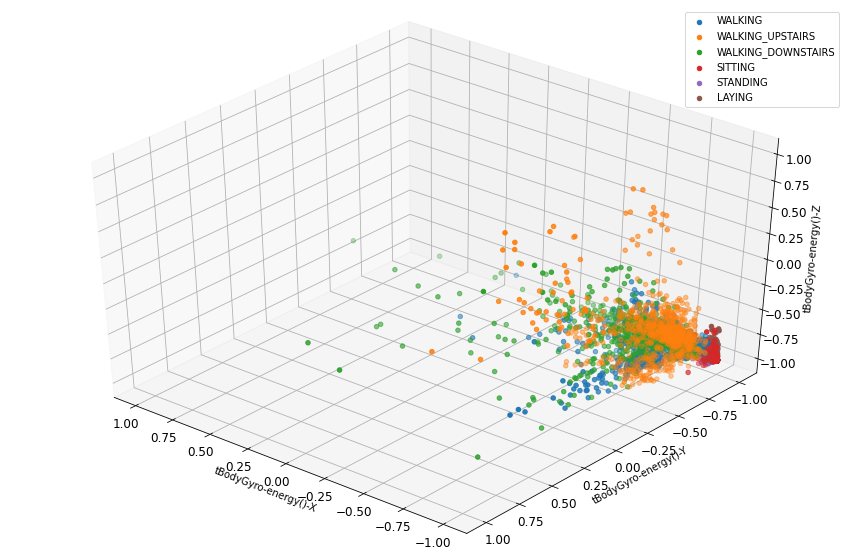

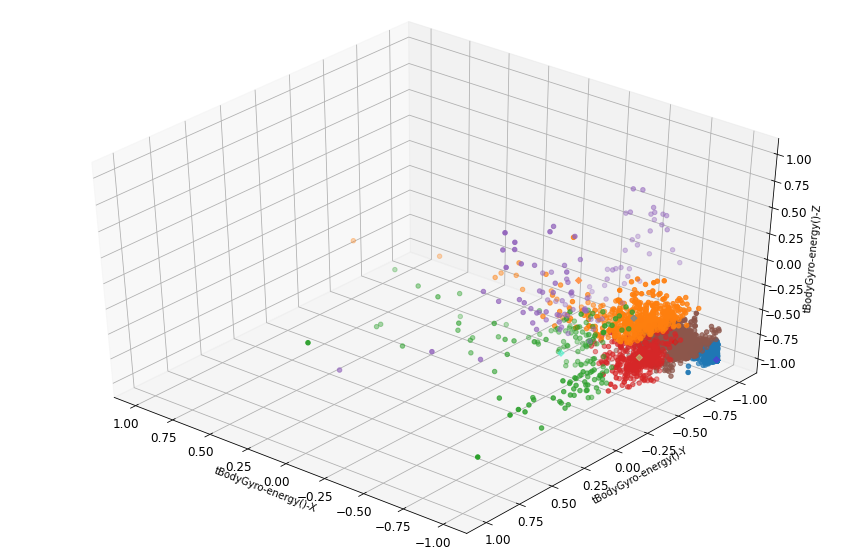

In [22]:
"""
Observe the class groupings in the subspace from the features:
'tBodyGyro-energy()-X', 'tBodyGyro-energy()-Y', 'tBodyGyro-energy()-Z'
"""
elev = 40
angle = 130

feats = ['tBodyGyro-energy()-X', 'tBodyGyro-energy()-Y', 'tBodyGyro-energy()-Z']
# Plot classifications
group_scatter_plot(Xtrain, ytrain, feats, activity_names, leg_on=True, elev=elev, angle=angle)

# Compute actual cluster centers
tBodyGyro_energy_centers = compute_class_centers(Xtrain, ytrain, feats, range(nclasses))

# Determine clusters
ins = Xtrain[feats]
model = KMeans(n_clusters=6, init='random', n_init=10, n_jobs=-1)
model.fit(ins)
pred = model.predict(ins)

# Plot determined clusters
group_scatter_plot(Xtrain, pred, feats, activity_names, elev=elev,
                   angle=angle, centers=model.cluster_centers_)
#err = mean_squared_error(tBodyGyro_energy_centers, model.cluster_centers_)
#print(err)

model.inertia_

/Users/alanlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


188.1535534623448

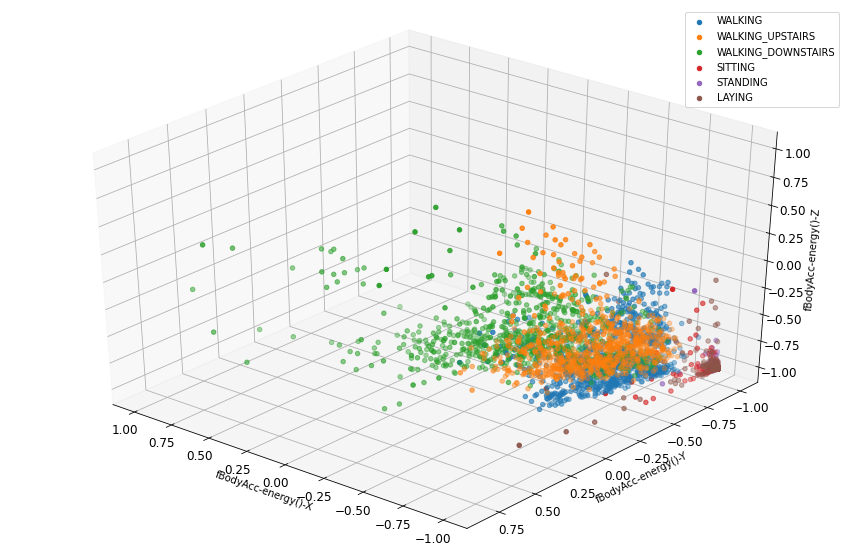

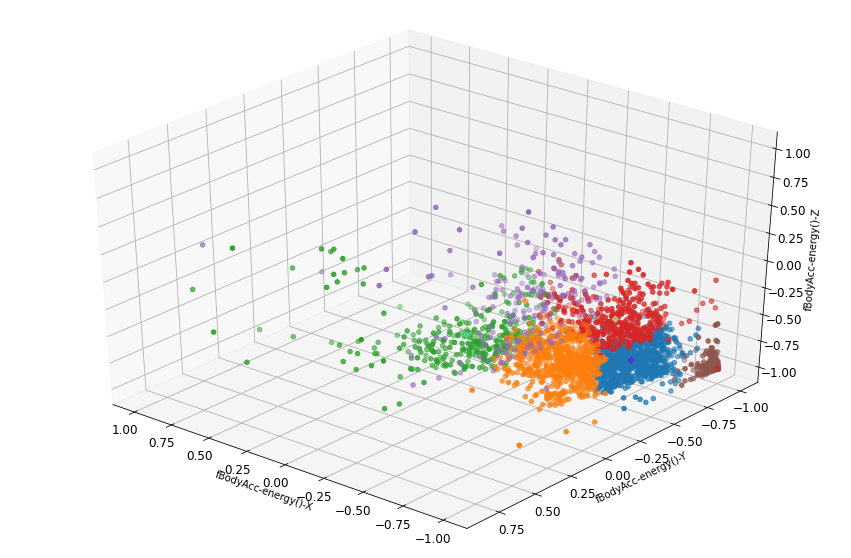

In [23]:
"""
Observe the class groupings in the subspace from the features:
'fBodyAcc-energy()-X', 'fBodyAcc-energy()-Y', 'fBodyAcc-energy()-Z'
"""
angle = 130

feats = ['fBodyAcc-energy()-X', 'fBodyAcc-energy()-Y', 'fBodyAcc-energy()-Z']
# Plot classifications
group_scatter_plot(Xtrain, ytrain, feats, activity_names, leg_on=True, angle=angle)

# Compute the actual centers
fBodyAcc_energy_centers = compute_class_centers(Xtrain, ytrain, feats, range(nclasses))

# Determine clusters
ins = Xtrain[feats]
model = KMeans(n_clusters=6, init='random', n_init=10, n_jobs=-1)
model.fit(ins)
pred = model.predict(ins)

# Plot determined clusters
group_scatter_plot(Xtrain, pred, feats, activity_names,
                   angle=angle, centers=model.cluster_centers_)
#err = mean_squared_error(fBodyAcc_energy_centers, model.cluster_centers_)
#print(err)

model.inertia_

/Users/alanlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


137.95235117800297

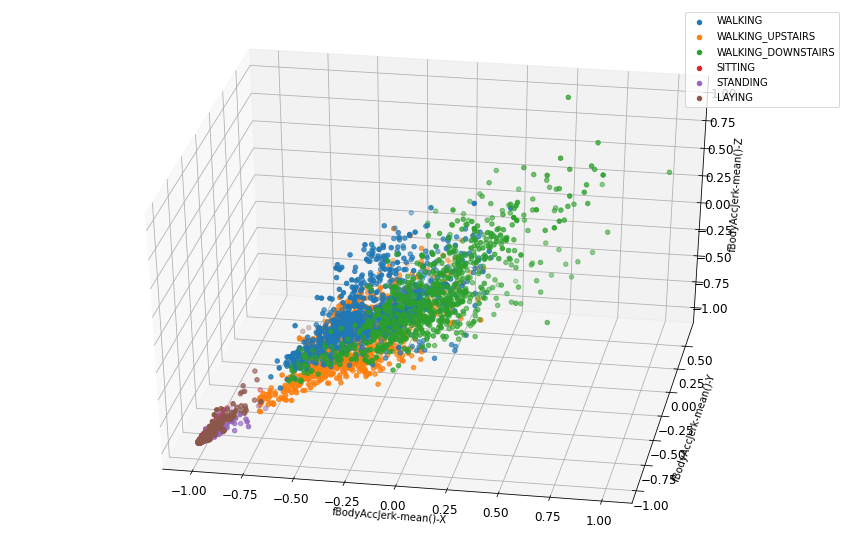

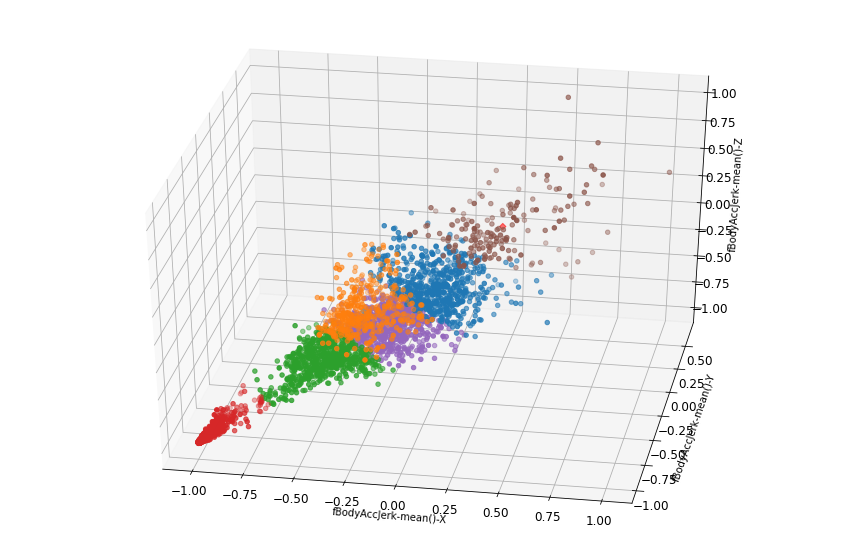

In [24]:
"""
Observe the class groupings in the subspace from the features:
'fBodyAccJerk-mean()-X', 'fBodyAccJerk-mean()-Y', 'fBodyAccJerk-mean()-Z'
"""
angle = 280

feats = ['fBodyAccJerk-mean()-X', 'fBodyAccJerk-mean()-Y', 'fBodyAccJerk-mean()-Z']
# Plot classifications
group_scatter_plot(Xtrain, ytrain, feats, activity_names, leg_on=True, angle=angle)

# Compute the actual centers
fBodyAccJerk_mean_centers = compute_class_centers(Xtrain, ytrain, feats, range(nclasses))

# Determine clusters
ins = Xtrain[feats]
model = KMeans(n_clusters=6, init='random',  n_init=10, n_jobs=-1)
model.fit(ins)
pred = model.predict(ins)

# Plot determined clusters
group_scatter_plot(Xtrain, pred, feats, activity_names,
                   angle=angle, centers=model.cluster_centers_)
#err = mean_squared_error(fBodyAccJerk_mean_centers, model.cluster_centers_)
#print(err)

# Sum of squared distances of samples to their closest cluster center
model.inertia_

/Users/alanlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


185.74389819612668

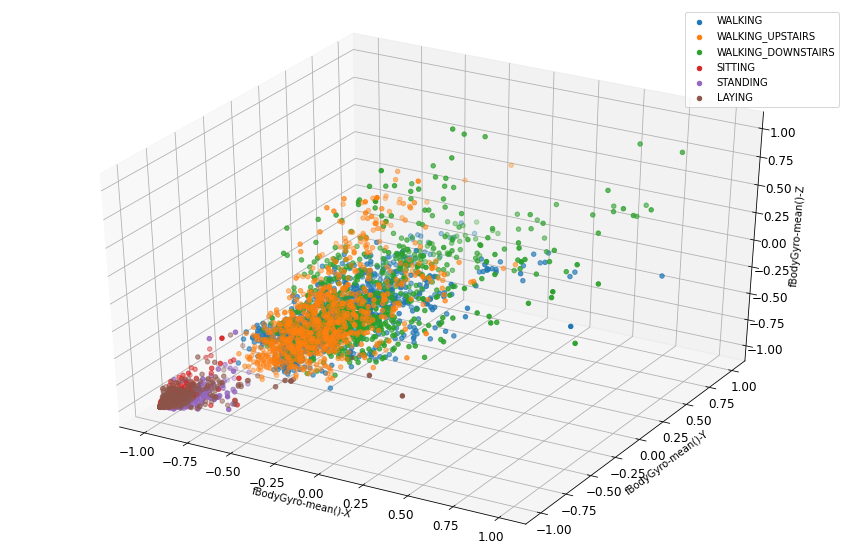

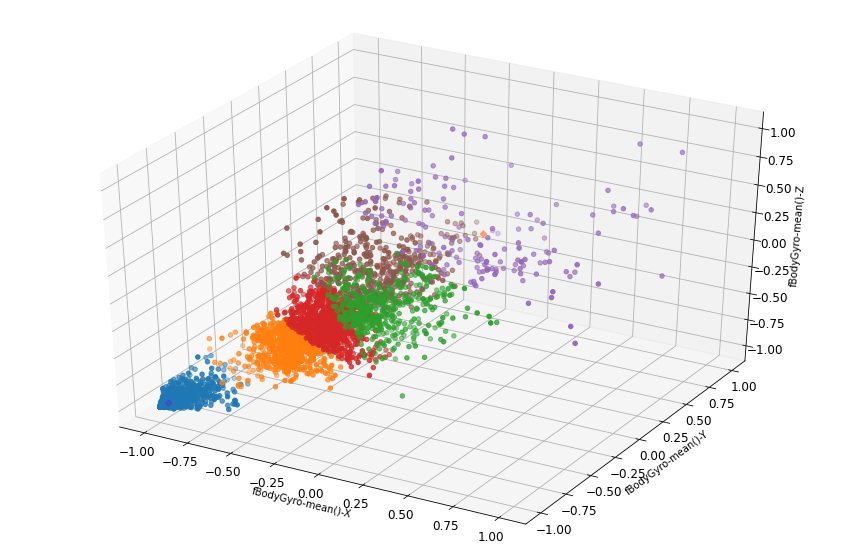

In [25]:
"""
Observe the class groupings in the subspace from the features:
'fBodyGyro-mean()-X', 'fBodyGyro-mean()-Y', 'fBodyGyro-mean()-Z'
"""
angle = 300

feats = ['fBodyGyro-mean()-X', 'fBodyGyro-mean()-Y', 'fBodyGyro-mean()-Z']
# Plot classifications
group_scatter_plot(Xtrain, ytrain, feats, activity_names, leg_on=True, angle=angle)

# Compute the actual centers
fBodyGyro_mean_centers = compute_class_centers(Xtrain, ytrain, feats, range(nclasses))

# Determine clusters
ins = Xtrain[feats]
model = KMeans(n_clusters=6, init='random', n_init=10, n_jobs=-1)
model.fit(ins)
pred = model.predict(ins)

# Plot determined clusters
group_scatter_plot(Xtrain, pred, feats, activity_names,
                   angle=angle, centers=model.cluster_centers_)

#err = mean_squared_error(fBodyGyro_mean_centers, model.cluster_centers_)
#print(err)

model.inertia_

/Users/alanlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


116.25232676685137

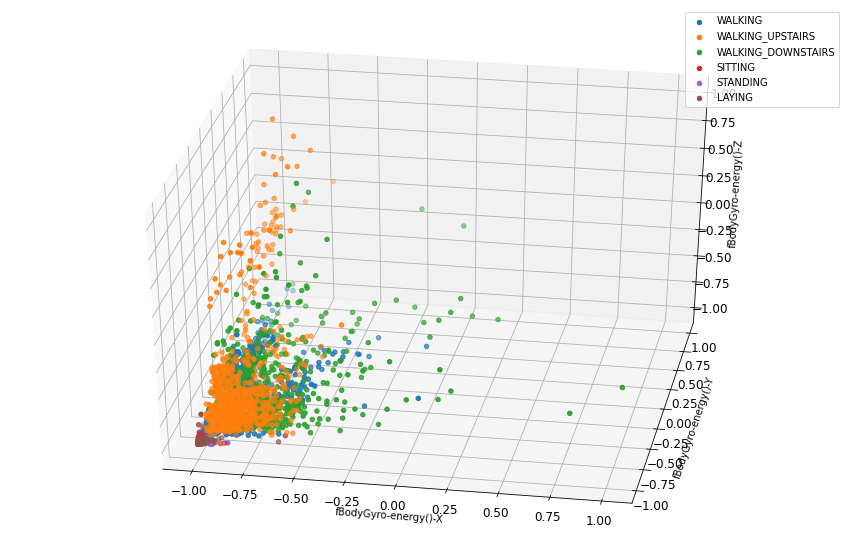

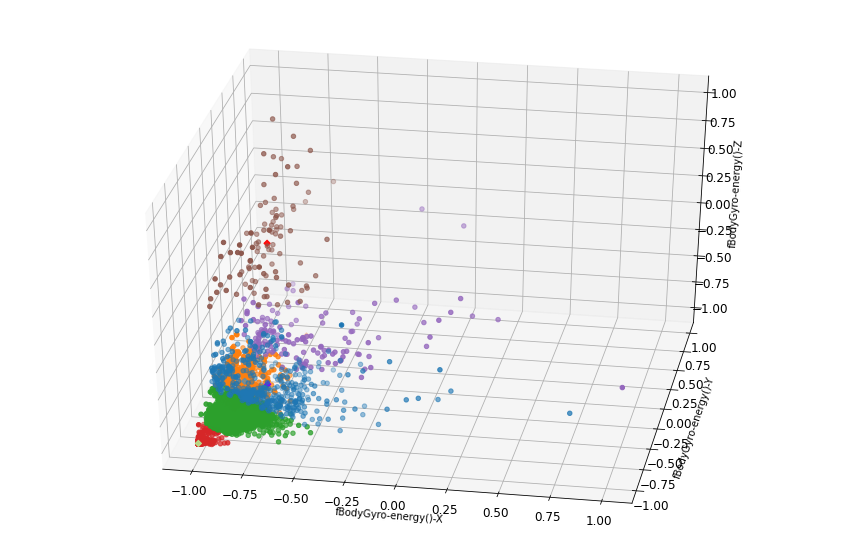

In [26]:
"""
Observe the class groupings in the subspace from the features:
'fBodyGyro-energy()-X', 'fBodyGyro-energy()-Y', 'fBodyGyro-energy()-Z'
"""
angle = 280

feats = ['fBodyGyro-energy()-X', 'fBodyGyro-energy()-Y', 'fBodyGyro-energy()-Z']
# Plot classifications
group_scatter_plot(Xtrain, ytrain, feats, activity_names, leg_on=True, angle=angle)

# Compute the actual centers
fBodyGyro_energy_centers = compute_class_centers(Xtrain, ytrain, feats, range(nclasses))

# Determine clusters
ins = Xtrain[feats]
model = KMeans(n_clusters=6, init='random', n_init=10, n_jobs=-1)
model.fit(ins)
pred = model.predict(ins)

# Plot determined clusters
group_scatter_plot(Xtrain, pred, feats, activity_names,
                   angle=angle, centers=model.cluster_centers_)

#err = mean_squared_error(fBodyGyro_energy_centers, model.cluster_centers_)
#print(err)

model.inertia_

/Users/alanlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


124.3759003666537

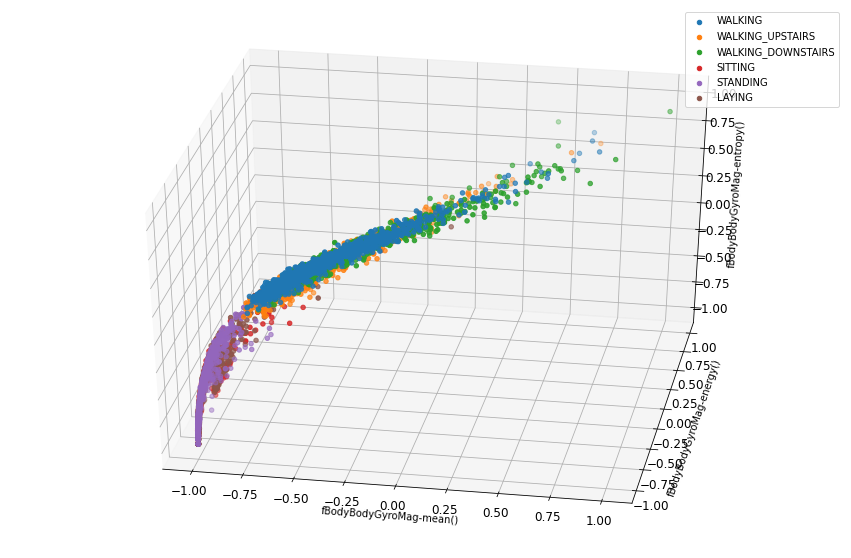

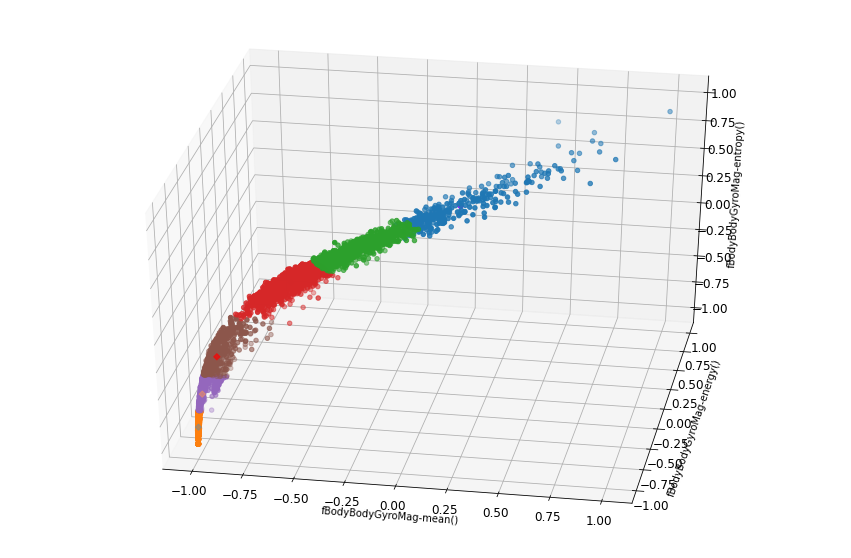

In [27]:
"""
Observe the class groupings in the subspace from the features:
'fBodyBodyGyroMag-mean()', 'fBodyBodyGyroMag-energy()', 'fBodyBodyGyroMag-entropy()'
"""
angle = 280

feats = ['fBodyBodyGyroMag-mean()', 'fBodyBodyGyroMag-energy()', 'fBodyBodyGyroMag-entropy()']
# Plot classifications
group_scatter_plot(Xtrain, ytrain, feats, activity_names, leg_on=True, angle=angle)

# Compute the actual centers
fBodyBodyGyroMag_mean_centers = compute_class_centers(Xtrain, ytrain, feats, range(nclasses))

# Determine clusters
ins = Xtrain[feats]
model = KMeans(n_clusters=6, init='random', n_init=10, n_jobs=-1)
model.fit(ins)
pred = model.predict(ins)

# Plot determined clusters
group_scatter_plot(Xtrain, pred, feats, activity_names,
                   angle=angle, centers=model.cluster_centers_)

#err = mean_squared_error(fBodyBodyGyroMag_mean_centers, model.cluster_centers_)
#print(err)

# Number correct
model.inertia_

### IsoMap

/Users/alanlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


121469.32097438944

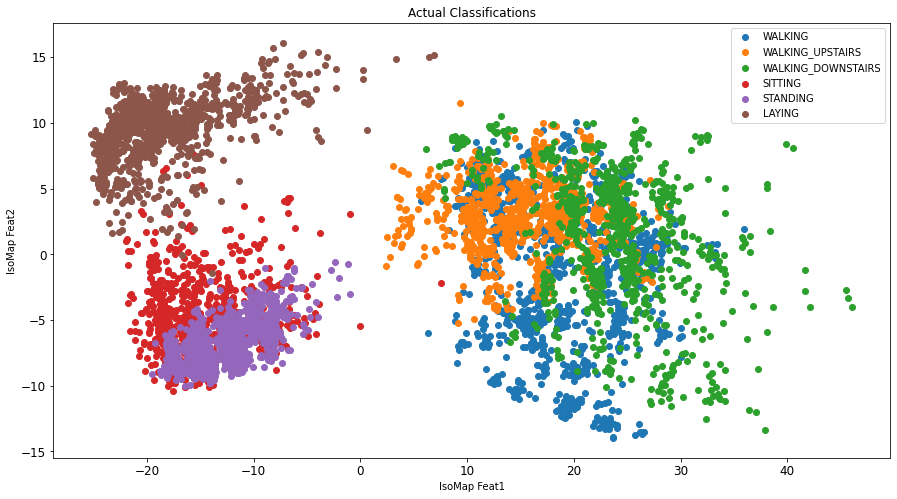

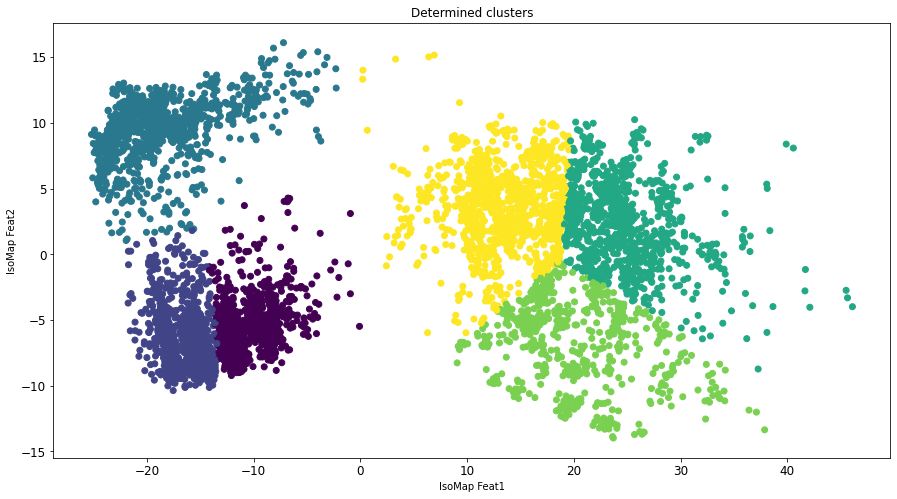

In [28]:
""" TODO
Reduce the full feature space (i.e. all 561 features) down to 
2 features (i.e n_components) using Isomap. Also, make sure to 
determine a goodchoice for the number of neighbors.

Display the classes in the new feature space.

Then construct a KMeans model to locate a set of 6 clusters
in this new feature subspace. Display the determined clusters in 
this new feature subspace.
"""
# TODO: Create the Isomap object and transform the training data
isomap2 = Isomap(n_neighbors=18, n_components=2) # TODO: create Isomap object
Xmap2 = isomap2.fit_transform(Xtrain) # TODO: transform the training data

# TODO: Plot actual classifications in the new feature space
fig = plt.figure(figsize=(15,8))
ax0 = fig.add_subplot(111)
for i, name in enumerate(activity_names):
    # Mask of examples belonging to the current class 
    inds = ytrain == i
    # TODO: use scatter to plot the selected examples in the isomap
    # subspace. set the label to the class name
    # see the API pages for matplotlib scatter
    ax0.scatter(Xmap2[inds,0], Xmap2[inds,1], label=name)
ax0.set(xlabel='IsoMap Feat1', ylabel='IsoMap Feat2')
ax0.set_title('Actual Classifications')
ax0.legend()


# TODO: Construct a KMeans Model. fit it to the Isomap features
iso2_model = KMeans(n_clusters=6, init='random', n_init=10, n_jobs=-1)
iso2_model.fit(Xmap2) # TODO: create and fit the model
# TODO: determine the cluster groupings using predict
pred = iso2_model.predict(Xmap2)

# TODO: Plot determined predicted clusters
fig = plt.figure(figsize=(15,8))
ax0 = fig.add_subplot(111)
# TODO: use scatter to plot all the examples in the isomap subspace.
# do not set the label, instead set the parameter c to the predicted clusters
# see the API pages for matplotlib scatter
ax0.scatter(Xmap2[:,0], Xmap2[:,1], c=pred)
ax0.set(xlabel='IsoMap Feat1', ylabel='IsoMap Feat2')
ax0.set_title('Determined clusters')

# Sum of squared distances of samples to their closest cluster center
iso2_model.inertia_

/Users/alanlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


185263.55295836247

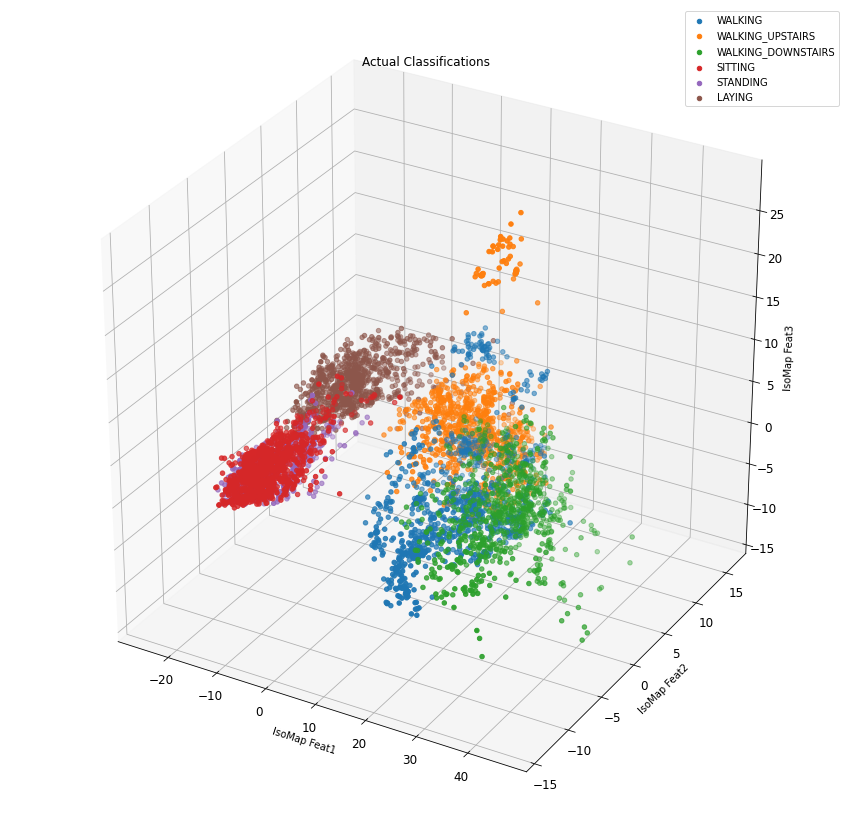

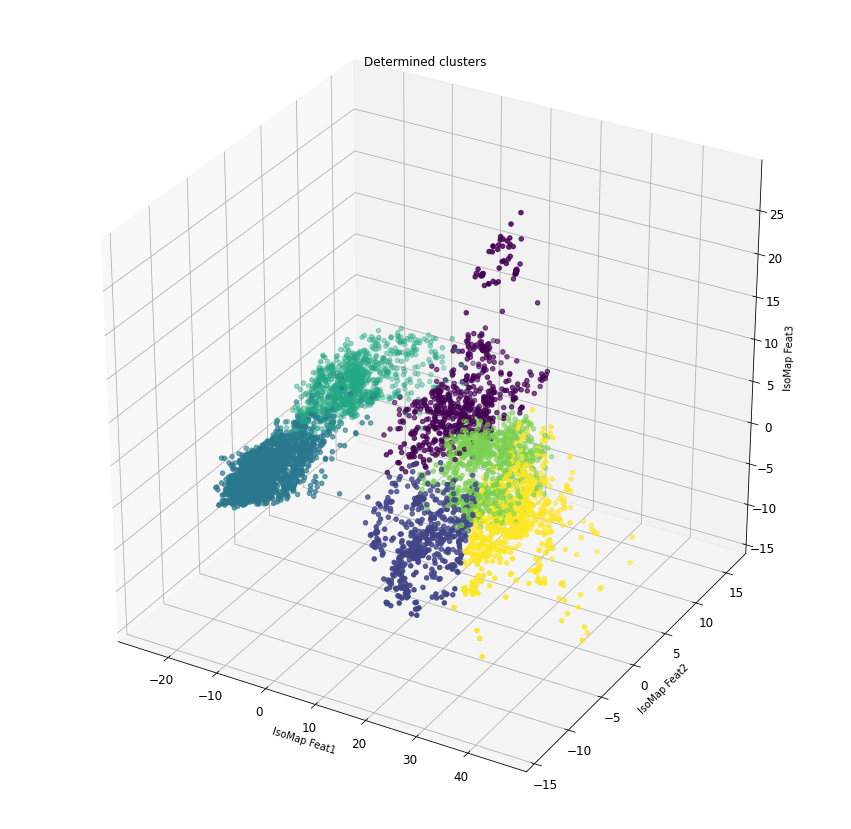

In [29]:
""" TODO
Reduce the full feature space (i.e. all 561 features) down to 
3 features using Isomap. Also, make sure to determine a good 
choice for the number of neighbors.

Display the classes in the new feature space.

Then construct a KMeans model to locate a set of 6 clusters
in this new feature space. Display the determined clusters in 
this new feature space.
"""
# TODO: Create the Isomap object and transform the training data
isomap3 = Isomap(n_neighbors=18, n_components=3) # TODO
Xmap3 = isomap3.fit_transform(Xtrain) # TODO

# TODO: Plot actual classifications in the new feature space
fig = plt.figure(figsize=(15,15))
ax0 = fig.add_subplot(111, projection='3d')
for i, name in enumerate(activity_names):
    # Mask of examples belonging to the current class 
    inds = ytrain == i
    # TODO: use scatter to plot the selected examples in the isomap
    # subspace. set the label to the class name
    # see the API pages for matplotlib scatter
    ax0.scatter(Xmap3[inds,0], Xmap3[inds,1], Xmap3[inds,2], label=name)
ax0.set(xlabel='IsoMap Feat1', ylabel='IsoMap Feat2', zlabel='IsoMap Feat3')
ax0.set_title('Actual Classifications')
ax0.legend()


# TODO: Construct a KMeans Model
iso3_model = KMeans(n_clusters=6, init='random', n_init=10, n_jobs=-1)
iso3_model.fit(Xmap3) # TODO
# TODO: determine the cluster groupings
pred = iso3_model.predict(Xmap3) # TODO

# TODO: Plot determined clusters
fig = plt.figure(figsize=(15,15))
ax0 = fig.add_subplot(111, projection='3d')
# TODO: use scatter to plot all the examples in the isomap subspace.
# do not set the label, instead set the parameter c to the predicted clusters
# see the API pages for matplotlib scatter
ax0.scatter(Xmap3[:,0], Xmap3[:,1], Xmap3[:,2], c=pred)
ax0.set(xlabel='IsoMap Feat1', ylabel='IsoMap Feat2', zlabel='IsoMap Feat3')
#ax0.view_init(elev, angle)
ax0.set_title('Determined clusters')

iso3_model.inertia_

### PCA

/Users/alanlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


1277.4778367337865

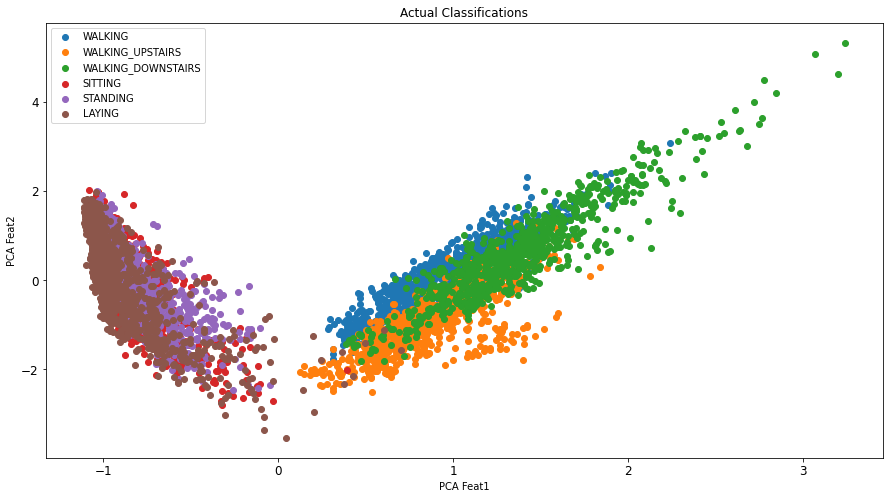

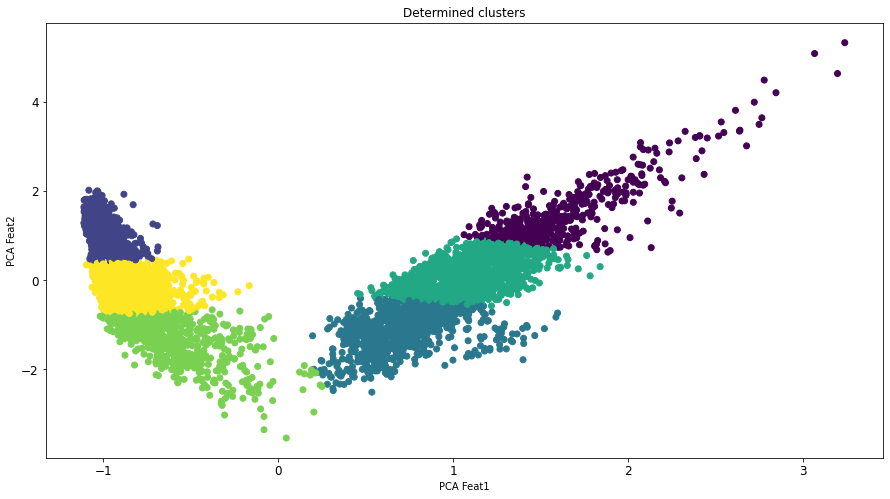

In [30]:
""" TODO
Reduce the full feature space (i.e. all 561 features) down to 
2 features using PCA. Also, set whiten to True.

Display the classes in the new feature space.

Then construct a KMeans model to locate a set of 6 clusters
in this new feature space. Display the determined clusters in 
this new feature space.
"""
# TODO: Create the PCA object and transform the training data
pca2 = PCA(n_components=2, whiten=True) # TODO
Xpca2 = pca2.fit_transform(Xtrain) # TODO

# TODO: Plot actual classifications in the new feature space
fig = plt.figure(figsize=(15,8))
ax0 = fig.add_subplot(111)
for i, name in enumerate(activity_names):
    # Mask of examples belonging to the current class 
    inds = ytrain == i
    # TODO: use scatter to plot the selected examples in the PCA
    # subspace. set the label to the class name
    # see the API pages for matplotlib scatter
    ax0.scatter(Xpca2[inds,0], Xpca2[inds,1], label=name)
ax0.set(xlabel='PCA Feat1', ylabel='PCA Feat2')
ax0.set_title('Actual Classifications')
ax0.legend()



# TODO: Construct a KMeans Model. fit the model to the PCA features
pca2_model = KMeans(n_clusters=6, init='random', n_init=10, n_jobs=-1)
pca2_model.fit(Xpca2) # TODO
# TODO: determine the cluster groupings
pred = pca2_model.predict(Xpca2) # TODO

# TODO: Plot determined clusters
fig = plt.figure(figsize=(15,8))
ax0 = fig.add_subplot(111)
# TODO: use scatter to plot all the examples in the isomap subspace.
# do not set the label, instead set the parameter c to the predicted clusters
# see the API pages for matplotlib scatter
ax0.scatter(Xpca2[:,0], Xpca2[:,1], c=pred)
ax0.set(xlabel='PCA Feat1', ylabel='PCA Feat2')
ax0.set_title('Determined clusters')

pca2_model.inertia_

/Users/alanlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


3071.076056314479

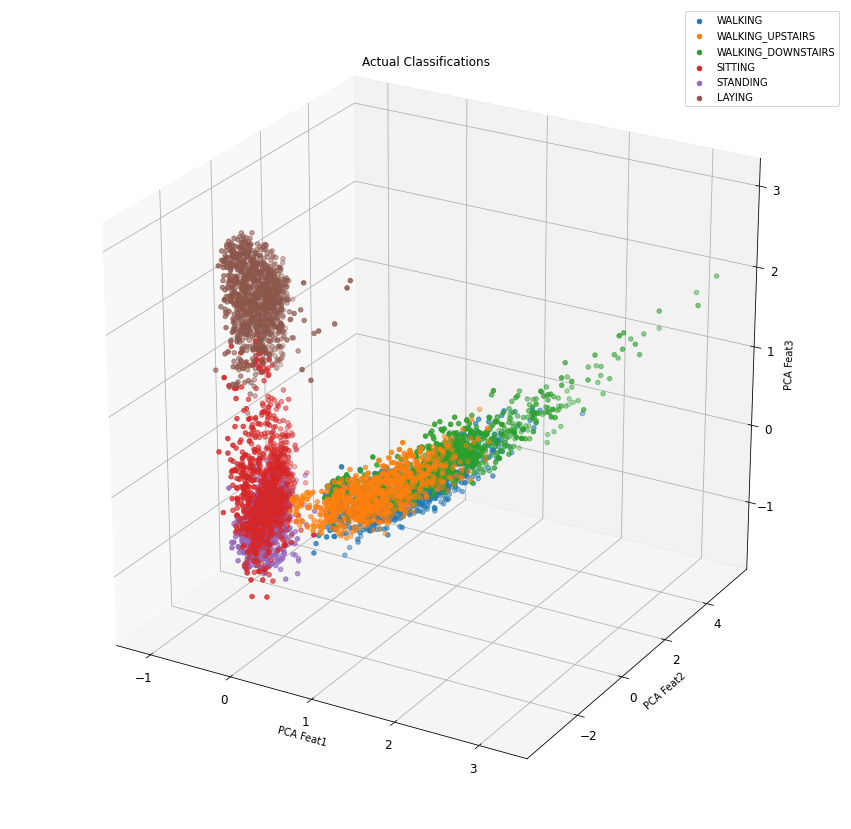

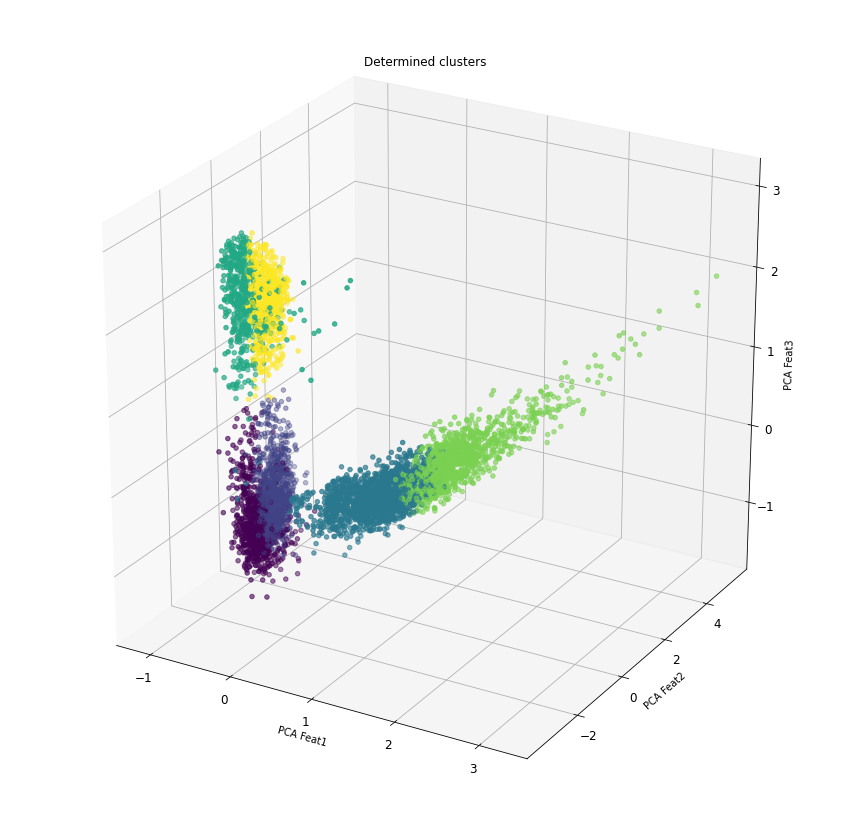

In [31]:
""" TODO
Reduce the full feature space (i.e. all 561 features) down to 
3 features using PCA. Also, set whiten to True.

Display the classes in the new feature space.

Then construct a KMeans model to locate a set of 6 clusters
in this new feature space. Display the determined clusters in 
this new feature space.
"""
# TODO: Create the PCA object and transform the training data
pca3 = PCA(n_components=3, whiten=True) # TODO
Xpca3 = pca3.fit_transform(Xtrain) # TODO

# TODO: Plot actual classifications in the new feature space
elev = 25
angle = 300
fig = plt.figure(figsize=(15,15))
ax0 = fig.add_subplot(111, projection='3d')
for i, name in enumerate(activity_names):
    # Mask of examples belonging to the current class 
    inds = ytrain == i
    # TODO: use scatter to plot the selected examples in the PCA
    # subspace. set the label to the class name
    # see the API pages for matplotlib scatter
    ax0.scatter(Xpca3[inds,0], Xpca3[inds,1], Xpca3[inds,2], label=name)
ax0.view_init(elev, angle)
ax0.set(xlabel='PCA Feat1', ylabel='PCA Feat2', zlabel='PCA Feat3')
ax0.set_title('Actual Classifications')
ax0.legend()


# TODO: Construct a KMeans Model. fit the model on the PCA features
pca3_model = KMeans(n_clusters=6, init='random', n_init=10, n_jobs=-1)
pca3_model.fit(Xpca3) # TODO
# TODO: determine the cluster groupings
pred = pca3_model.predict(Xpca3) # TODO

# TODO: Plot determined clusters
fig = plt.figure(figsize=(15,15))
ax0 = fig.add_subplot(111, projection='3d')
# TODO: use scatter to plot all the examples in the isomap subspace.
# do not set the label, instead set the parameter c to the predicted clusters
# see the API pages for matplotlib scatter
ax0.scatter(Xpca3[:,0], Xpca3[:,1], Xpca3[:,2], c=pred)
ax0.view_init(elev, angle)
ax0.set(xlabel='PCA Feat1', ylabel='PCA Feat2', zlabel='PCA Feat3')
ax0.set_title('Determined clusters')

pca3_model.inertia_

# TASK 2 DATASETS: SYNTHETIC DATA

### D31

In [32]:
""" PROVIDED
Load the dataset
"""
D31 = pd.read_csv('synthetic/D31.txt', sep='\s+', header=None)
D31.columns = ['x', 'y', 'group']
D31['group'] = D31['group'] - 1
D31.shape

(3100, 3)

In [33]:
# Display first few examples
D31.head()

x       y  group
0  25.0514  5.7475      0
1  26.6614  7.3414      0
2  25.2653  6.2466      0
3  25.2285  4.7447      0
4  25.7529  5.1564      0

In [34]:
""" TODO
Display class counts using pd.value_counts() on the group column
"""
d31_cnt = pd.value_counts(D31['group'])
d31_cnt

29    100
28    100
2     100
4     100
6     100
8     100
10    100
12    100
14    100
16    100
18    100
20    100
22    100
24    100
26    100
30    100
27    100
1     100
3     100
5     100
7     100
9     100
11    100
13    100
15    100
17    100
19    100
21    100
23    100
25    100
0     100
Name: group, dtype: int64

/Users/alanlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


5109.880037075824

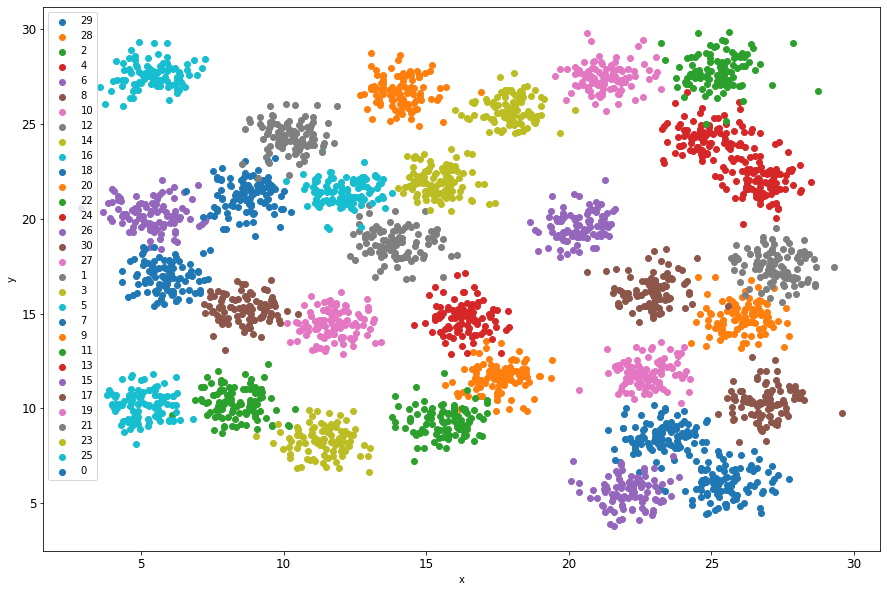

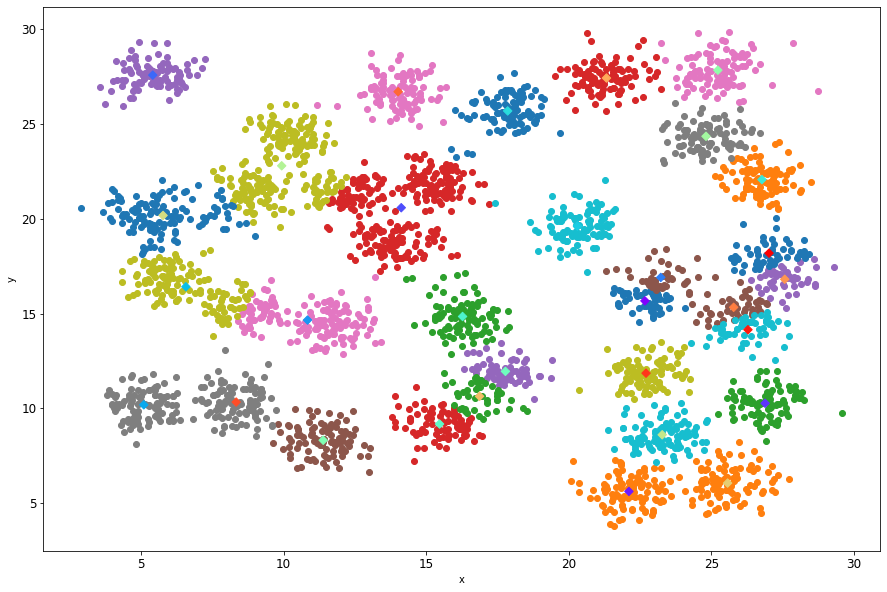

In [35]:
""" TODO
Display the actual classifications and the predicted clusters
"""
# Compute the actual centers
#d31_centers = compute_class_centers(D31, D31['group'].values, ['x', 'y'], cnt.index-1)

# TODO: Plot true classifications. use group_scatter_plot. 
# the feature names are ['x', 'y']. the label names are d31_cnt.index
group_scatter_plot(D31, D31['group'].values, ['x', 'y'], 
                   d31_cnt.index, leg_on=True)

# TODO: Determine clusters using KMeans
d31 = D31[['x', 'y']].copy()
model = KMeans(n_clusters=31, init='random', n_init=10, n_jobs=-1)
model.fit(d31)
pred = model.predict(d31)

# TODO: Plot the determined clusters. use group_scatter_plot. 
group_scatter_plot(D31, pred, ['x', 'y'], d31_cnt.index, centers=model.cluster_centers_)

model.inertia_

### AGGREGATION

In [36]:
""" PROVIDED
Load the dataset
"""
Aggregation = pd.read_csv('synthetic/Aggregation.txt', sep='\s+', header=None)
Aggregation.columns = ['x', 'y', 'group']
Aggregation['group'] = Aggregation['group'] - 1
Aggregation.shape

(788, 3)

In [37]:
Aggregation.head()

x      y  group
0  15.55  28.65      1
1  14.90  27.55      1
2  14.45  28.35      1
3  14.15  28.80      1
4  13.75  28.05      1

In [38]:
""" TODO
Display class counts
"""
agg_cnt = pd.value_counts(Aggregation['group'])
agg_cnt

3    273
1    170
5    130
2    102
0     45
6     34
4     34
Name: group, dtype: int64

/Users/alanlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


10998.471527258895

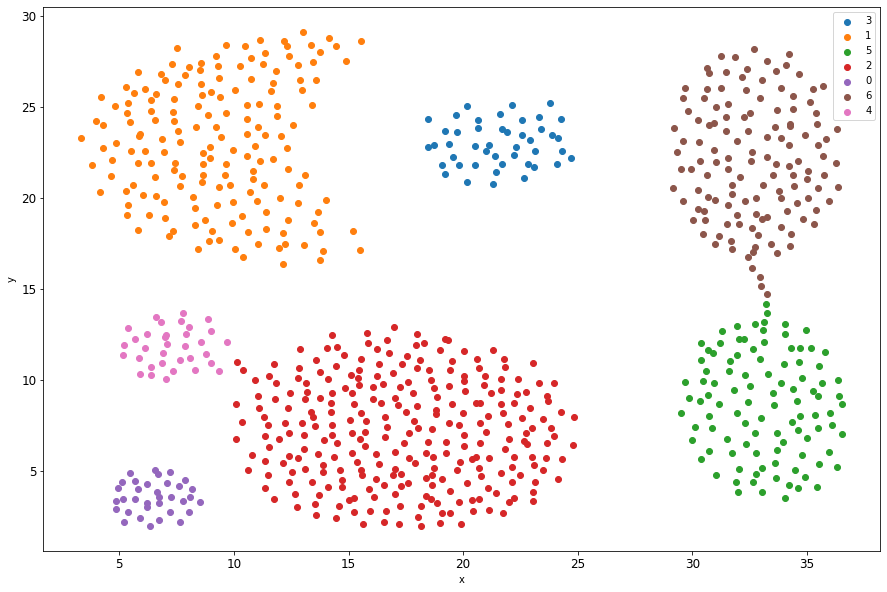

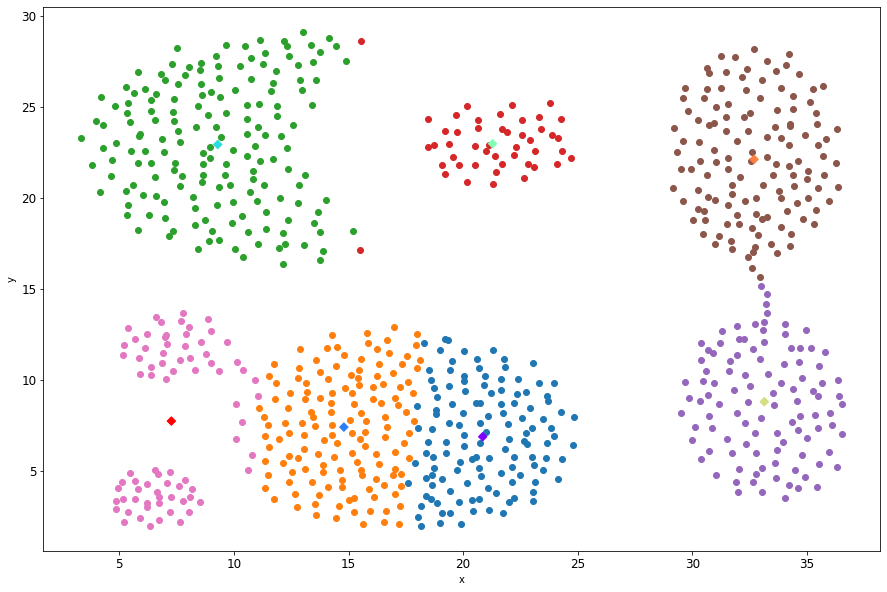

In [39]:
""" TODO
Display the actual and predicted clusters
"""
# Compute the actual centers
#d31_centers = compute_class_centers(D31, D31['cluster'].values, ['x', 'y'], cnt.index-1)

# TODO: Plot true classifications. use group_scatter_plot. 
# the feature names are ['x', 'y']. the label names are agg_cnt.index
group_scatter_plot(Aggregation, Aggregation['group'].values, ['x', 'y'], 
                     agg_cnt.index, leg_on=True)

# TODO: Determine clusters using KMeans
agg = Aggregation[['x', 'y']].copy()
model = KMeans(n_clusters=7, init='random', n_init=10, n_jobs=-1)
model.fit(agg)
pred = model.predict(agg)

# TODO: Plot the determined clusters. use group_scatter_plot. 
group_scatter_plot(Aggregation, pred, ['x', 'y'], agg_cnt.index, centers=model.cluster_centers_)

model.inertia_

### R15

In [40]:
""" PROVIDED
Load the dataset
"""
R15 = pd.read_csv('synthetic/R15.txt', sep='\s+', header=None)
R15.columns = ['x', 'y', 'group']
R15['group'] = R15['group'] - 1
R15.shape

(600, 3)

In [41]:
R15.head()

x       y  group
0   9.802  10.132      0
1  10.350   9.768      0
2  10.098   9.988      0
3   9.730   9.910      0
4   9.754  10.430      0

In [42]:
""" TODO
Display class counts
"""
r15_cnt = pd.value_counts(R15['group'])
r15_cnt

14    40
13    40
12    40
11    40
10    40
9     40
8     40
7     40
6     40
5     40
4     40
3     40
2     40
1     40
0     40
Name: group, dtype: int64

/Users/alanlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


108.61904081338349

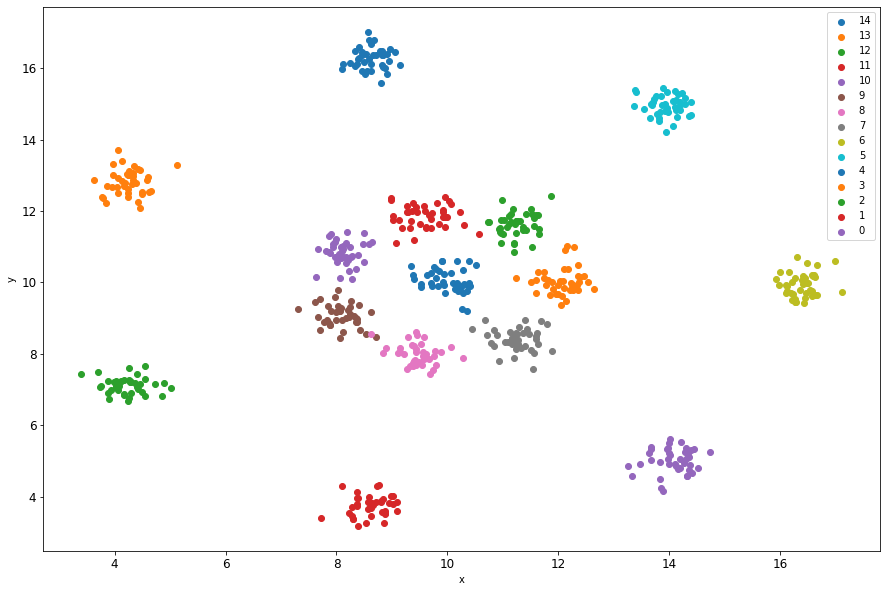

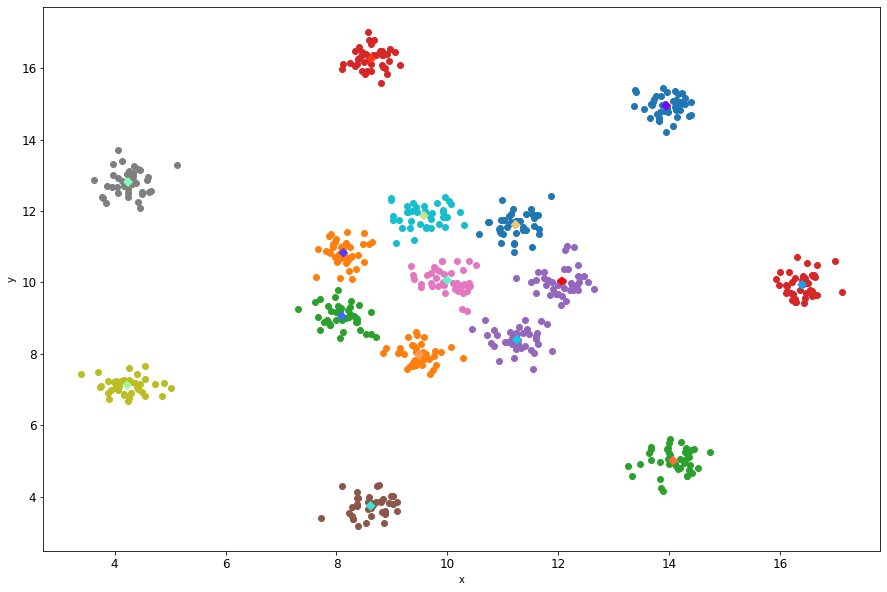

In [43]:
"""
Display the actual and predicted clusters
"""
# Compute the actual centers
#d31_centers = compute_class_centers(D31, D31['cluster'].values, ['x', 'y'], cnt.index-1)

# TODO: Plot true classifications. use group_scatter_plot. 
# the feature names are ['x', 'y']. the label names are r15_cnt.index
group_scatter_plot(R15, R15['group'].values, ['x', 'y'], r15_cnt.index, leg_on=True)

# TODO: Determine clusters using KMeans
r15 = R15[['x', 'y']].copy()
model = KMeans(n_clusters=15, init='random', n_init=10, n_jobs=-1)
model.fit(r15)
pred = model.predict(r15)

# TODO: Plot the determined clusters. use group_scatter_plot. 
group_scatter_plot(R15, pred, ['x', 'y'], r15_cnt.index, centers=model.cluster_centers_)

model.inertia_